In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/rociochavezmx/Rocio-Chavez-youtube-Files/master/Pacientes2.csv'

pacientes = pd.read_csv(url, index_col=0, engine='python')
pacientes.head()


,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,,
1,NO,0,0,1,0,0,38,0,0,0,0
2,SI,0,1,1,1,1,49,1,0,0,0
3,SI,1,1,0,1,1,59,1,0,0,1
4,NO,1,1,0,0,0,44,0,0,0,0
5,NO,0,0,1,0,0,42,0,0,0,0


In [3]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 1 to 909
Data columns (total 11 columns):
Enfermedad    985 non-null object
HIPERTEN      985 non-null int64
HIPERGLU      985 non-null int64
HDLBAJA       985 non-null int64
HIPERTRI      985 non-null int64
CINTALTA      985 non-null int64
EDAD          985 non-null int64
GENERO        985 non-null int64
FUMA          985 non-null int64
ALCOHOL       985 non-null int64
POLIURIA      985 non-null int64
dtypes: int64(10), object(1)
memory usage: 92.3+ KB


## Separamos las columnas de las variables predictoras de la columna que contiene la variable a predecir

In [4]:
#Variables predictoras
X =  pacientes.iloc[:, 1:11]

#Variable a predecir
y = pacientes.iloc[:,0]

#Mmostramos las primeras filas
X.head()


,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,
1,0,0,1,0,0,38,0,0,0,0
2,0,1,1,1,1,49,1,0,0,0
3,1,1,0,1,1,59,1,0,0,1
4,1,1,0,0,0,44,0,0,0,0
5,0,0,1,0,0,42,0,0,0,0


#  Dividimos nuestro Dataset en Training y Test set

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 731 to 28
Data columns (total 10 columns):
HIPERTEN    738 non-null int64
HIPERGLU    738 non-null int64
HDLBAJA     738 non-null int64
HIPERTRI    738 non-null int64
CINTALTA    738 non-null int64
EDAD        738 non-null int64
GENERO      738 non-null int64
FUMA        738 non-null int64
ALCOHOL     738 non-null int64
POLIURIA    738 non-null int64
dtypes: int64(10)
memory usage: 63.4 KB


# Creamos el modelo del Árbol de Desición

In [11]:
from sklearn.tree import DecisionTreeClassifier
# Llamamos al constructor de nuestro árbol de decisión

arbol = DecisionTreeClassifier(max_depth=4) # se le indica que solo cree 4 niveles


# Entrenamos el modelo

In [12]:
arbol_enfermedad = arbol.fit(X_train, y_train)

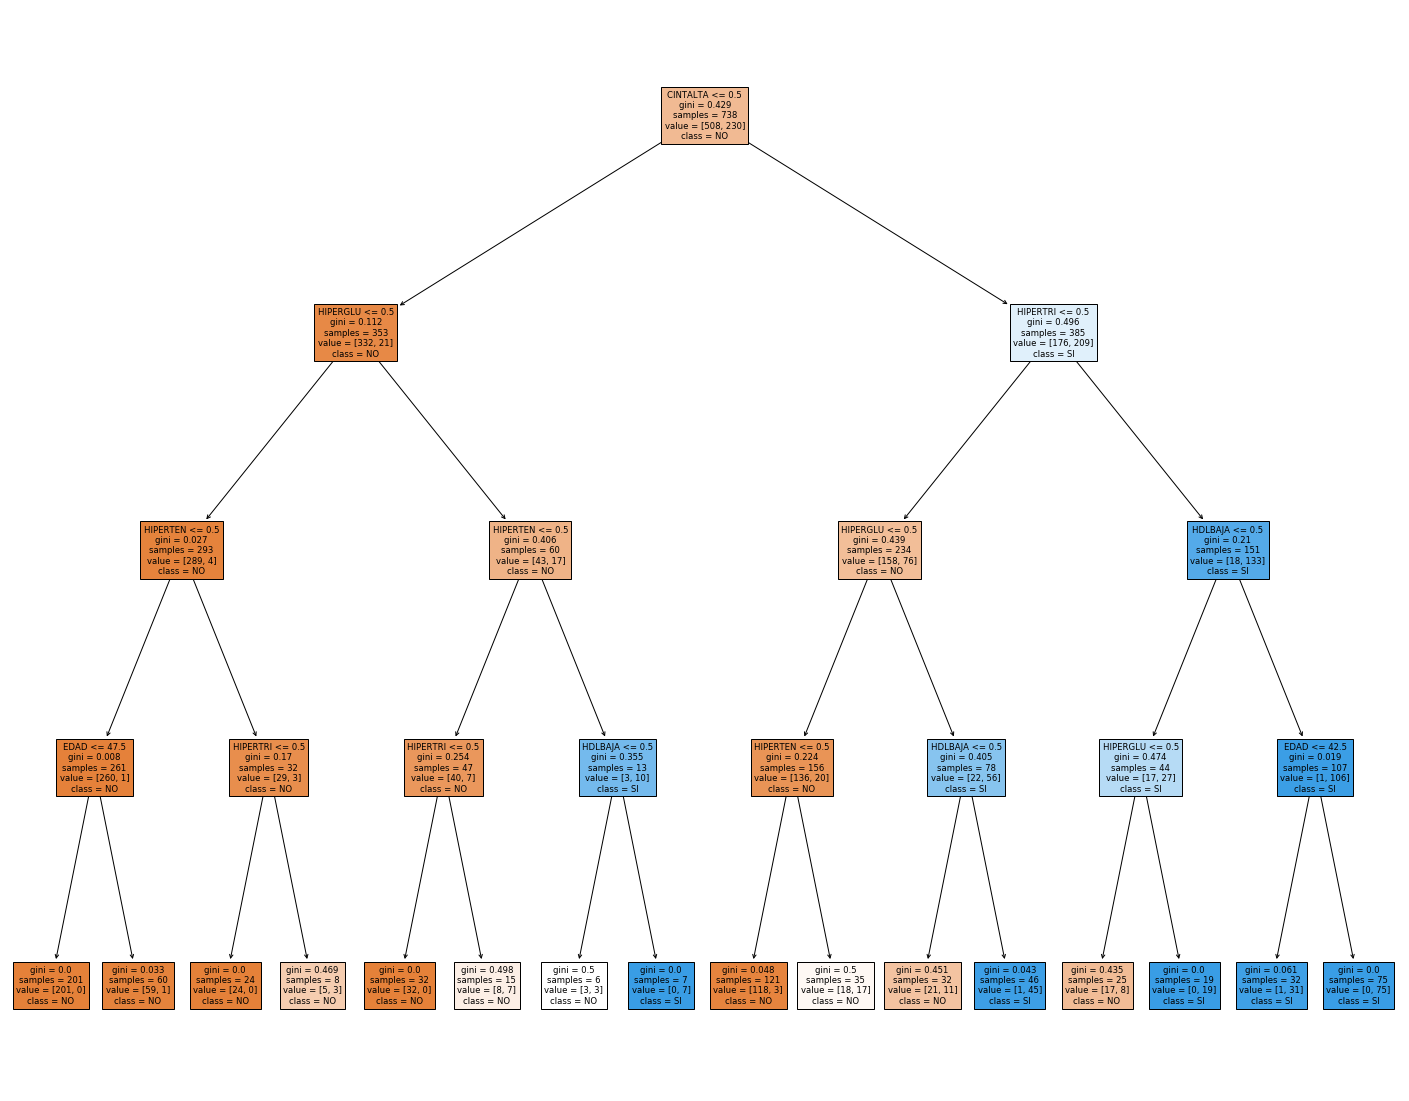

In [14]:
from sklearn import tree #Pare crear el gráfico de árbol de desición

fig = plt.figure(figsize=(25,20)) # Le indicamos las dimensiones del gráfico
tree.plot_tree(arbol_enfermedad, feature_names=list(X.columns.values), class_names=list(y.values), filled=True)

plt.show()

## Guardamos el gráfico de arbol de decisiones en nuetra laptop

In [15]:
fig.savefig('Image/Arbol de decision.png')

## Llevamos a cabo la predicción  con los datos contenidos  en la tabla de testing

In [17]:
# Predict the response for Test Dataset
y_pred = arbol_enfermedad.predict(X_test)

y_pred

array(['SI', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI', 'NO', 'NO',
       'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI',
       'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI',
       'NO', 'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'N

# Calculando la precisión del modelo

### Creamos la matriz de confusión 

In [18]:
from sklearn.metrics import confusion_matrix

matriz_de_confusion = confusion_matrix(y_test, y_pred)
matriz_de_confusion

array([[178,   3],
       [ 12,  54]])

In [19]:
precision_global = np.sum(matriz_de_confusion.diagonal() / np.sum(matriz_de_confusion))
precision_global

0.9392712550607287

# Calculamos la precisón por cada clase

In [20]:
precision_NO = ((matriz_de_confusion[0,0])) / sum(matriz_de_confusion[0,])
precision_NO

0.9834254143646409

In [21]:
precision_SI = ((matriz_de_confusion[1,1])) / sum(matriz_de_confusion[1,])
precision_SI

0.8181818181818182